In [ ]:
import pandas as pd
data=pd.read_csv("WNBA_2024.csv")


In [ ]:
from numpy import mean
print(data['PTS'].mean())
print(data['FG%'].mean())
print(data['3P%'].mean())
print(data['FT%'].mean())
print(data['OR'].mean())
print(data['DR'].mean())
print(data['AST'].mean())
print(data['STL'].mean())
print(data['BLK'].mean())
print(data['TO'].mean())

81.675
43.62499999999999
33.53333333333334
78.59166666666668
8.225
26.16666666666667
20.524999999999995
7.458333333333332
4.141666666666667
13.283333333333333


In [ ]:
print(min(data['PTS']))
print(min(data['FG%']))
print(min(data['3P%']))
print(min(data['FT%']))
print(min(data['OR']))
print(min(data['DR']))
print(min(data['AST']))
print(min(data['STL']))
print(min(data['BLK']))
print(min(data['TO']))

77.0
40.8
28.8
74.2
5.6
24.3
18.4
5.9
3.2
10.8


In [ ]:
print(max(data['PTS']))
print(max(data['FG%']))
print(max(data['3P%']))
print(max(data['FT%']))
print(max(data['OR']))
print(max(data['DR']))
print(max(data['AST']))
print(max(data['STL']))
print(max(data['BLK']))
print(max(data['TO']))

86.4
45.4
38.0
84.0
10.9
28.5
23.0
9.3
5.2
15.1


In [ ]:
from scipy.spatial.distance import pdist
ObservationData = data[['PTS', 'FG%', '3P%', 'FT%', 'OR', 'DR', 'AST', 'STL', 'BLK', 'TO']]
distance_matrix = pdist(ObservationData, 'euclidean')

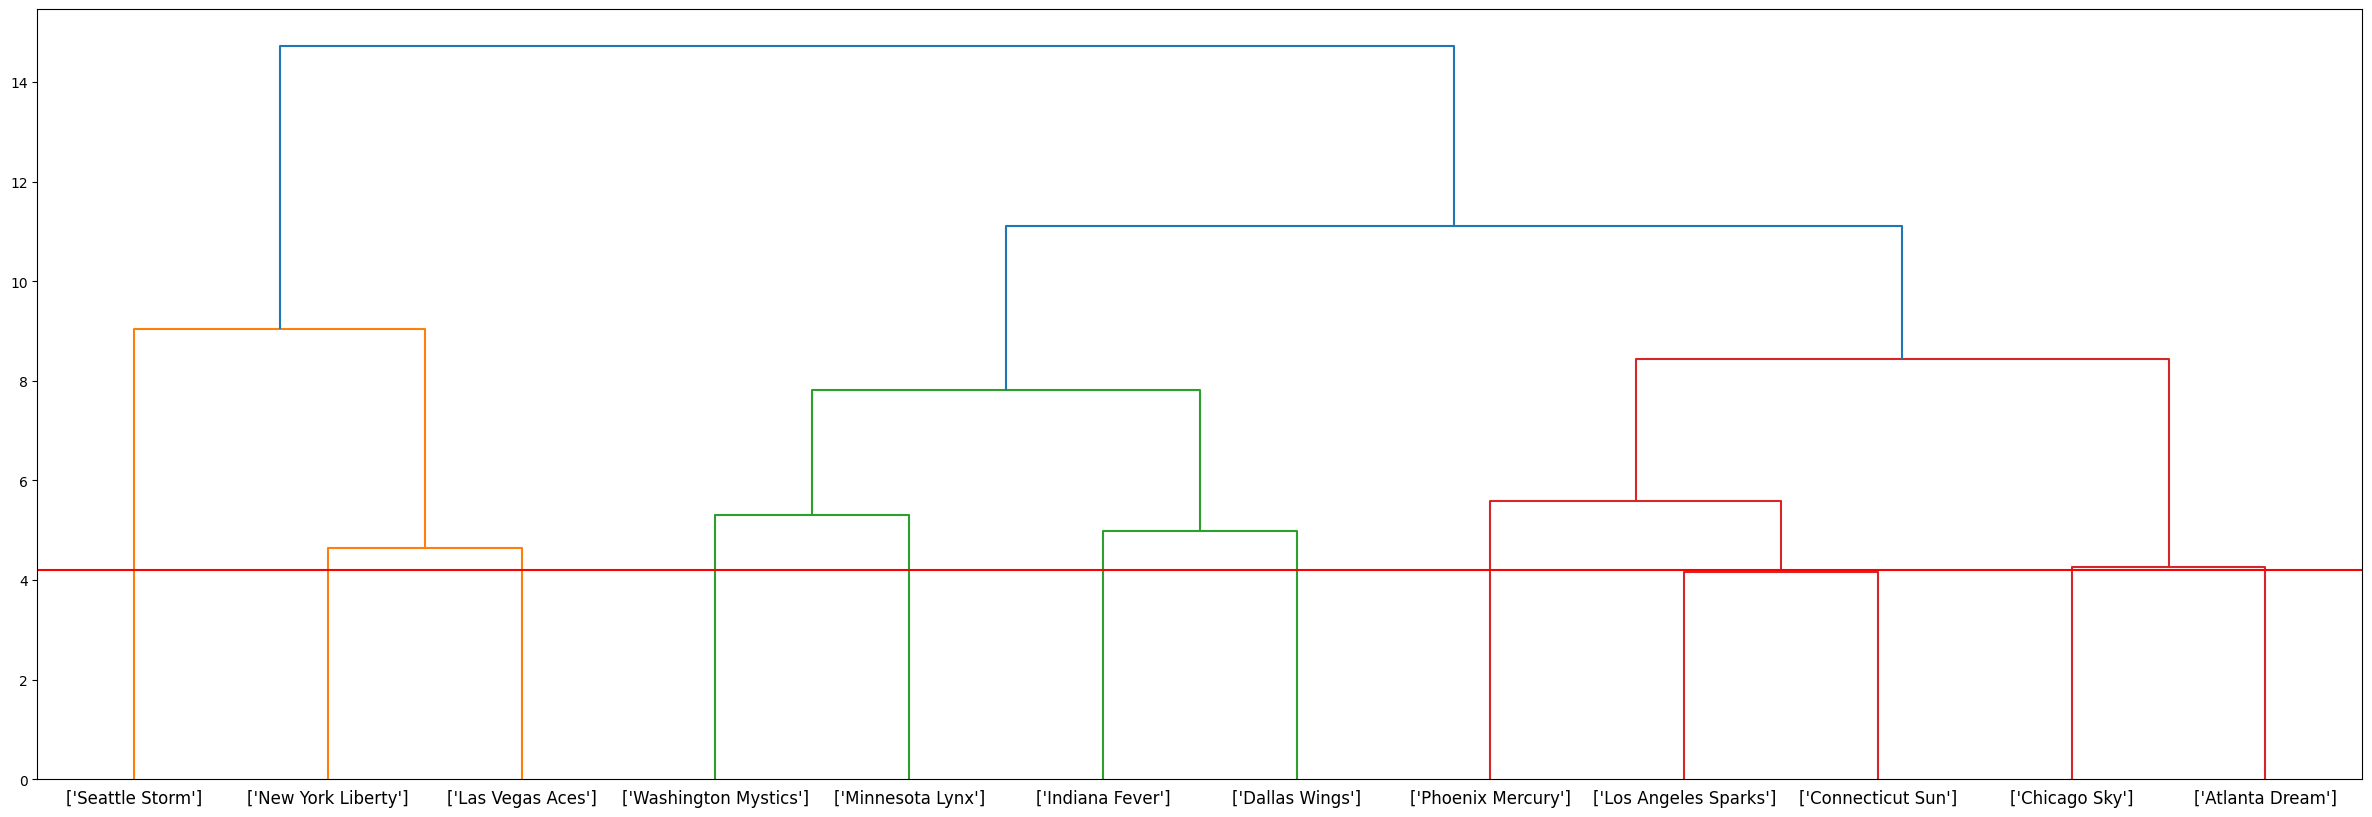

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
labels_array = data[["TEAM"]].to_numpy()
est = hierarchy.linkage(distance_matrix, method = 'complete', optimal_ordering = True)
dendrogram = hierarchy.dendrogram(est,labels=labels_array, color_threshold=10)
plt.axhline(y=4.2, color='r')

In [ ]:
cluster_labels = hierarchy.cut_tree(est, height = 10)
data['Cluster'] = cluster_labels
print(data['Cluster'])

0     0
1     1
2     2
3     0
4     0
5     1
6     2
7     2
8     1
9     2
10    1
11    2
Name: Cluster, dtype: int64


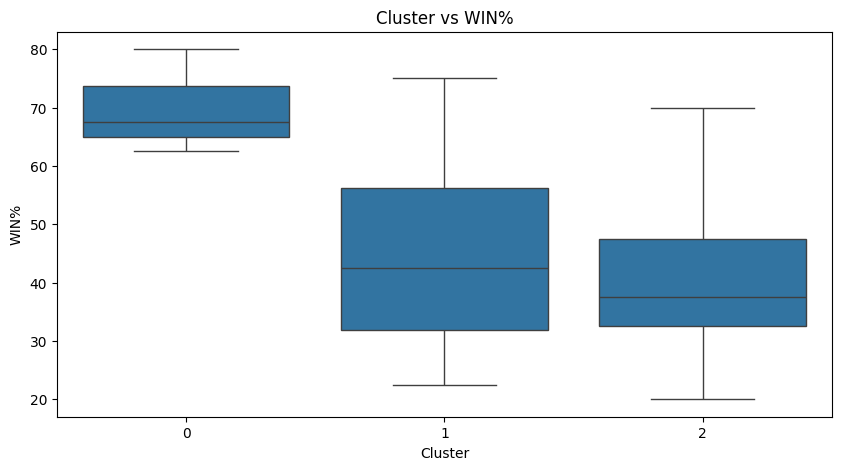

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x = 'Cluster', y = 'WIN%', data = data)
plt.xlabel('Cluster')
plt.ylabel('WIN%')
plt.title('Cluster vs WIN%')
plt.show()

In [ ]:
cluster_labels = hierarchy.cut_tree(est, height = 10)
data['Cluster'] = cluster_labels

for i in range(max(data['Cluster']+1)):
  cluster_info = data[(data['Cluster'] == i)]
  print('Cluster ' + str(i) + ':')
  print(cluster_info['TEAM'])
  print()

Cluster 0:
0    New York Liberty
3      Las Vegas Aces
4       Seattle Storm
Name: TEAM, dtype: object

Cluster 1:
1         Minnesota Lynx
5          Indiana Fever
8     Washington Mystics
10          Dallas Wings
Name: TEAM, dtype: object

Cluster 2:
2        Connecticut Sun
6        Phoenix Mercury
7          Atlanta Dream
9            Chicago Sky
11    Los Angeles Sparks
Name: TEAM, dtype: object



Normalize it because the distance between steals is not the same as the distance between win% or something

In [ ]:
def min_max_scaling(series):
  return (series - series.min()) / (series.max() - series.min())
data['PTS_normalized'] = min_max_scaling(data['PTS'])
data['FG%_normalized'] = min_max_scaling(data['FG%'])
data['3P%_normalized'] = min_max_scaling(data['3P%'])
data['FT%_normalized'] = min_max_scaling(data['FT%'])
data['OR_normalized'] = min_max_scaling(data['OR'])
data['DR_normalized'] = min_max_scaling(data['DR'])
data['AST_normalized'] = min_max_scaling(data['AST'])
data['STL_normalized'] = min_max_scaling(data['STL'])
data['BLK_normalized'] = min_max_scaling(data['BLK'])
data['TO_normalized'] = min_max_scaling(data['TO'])

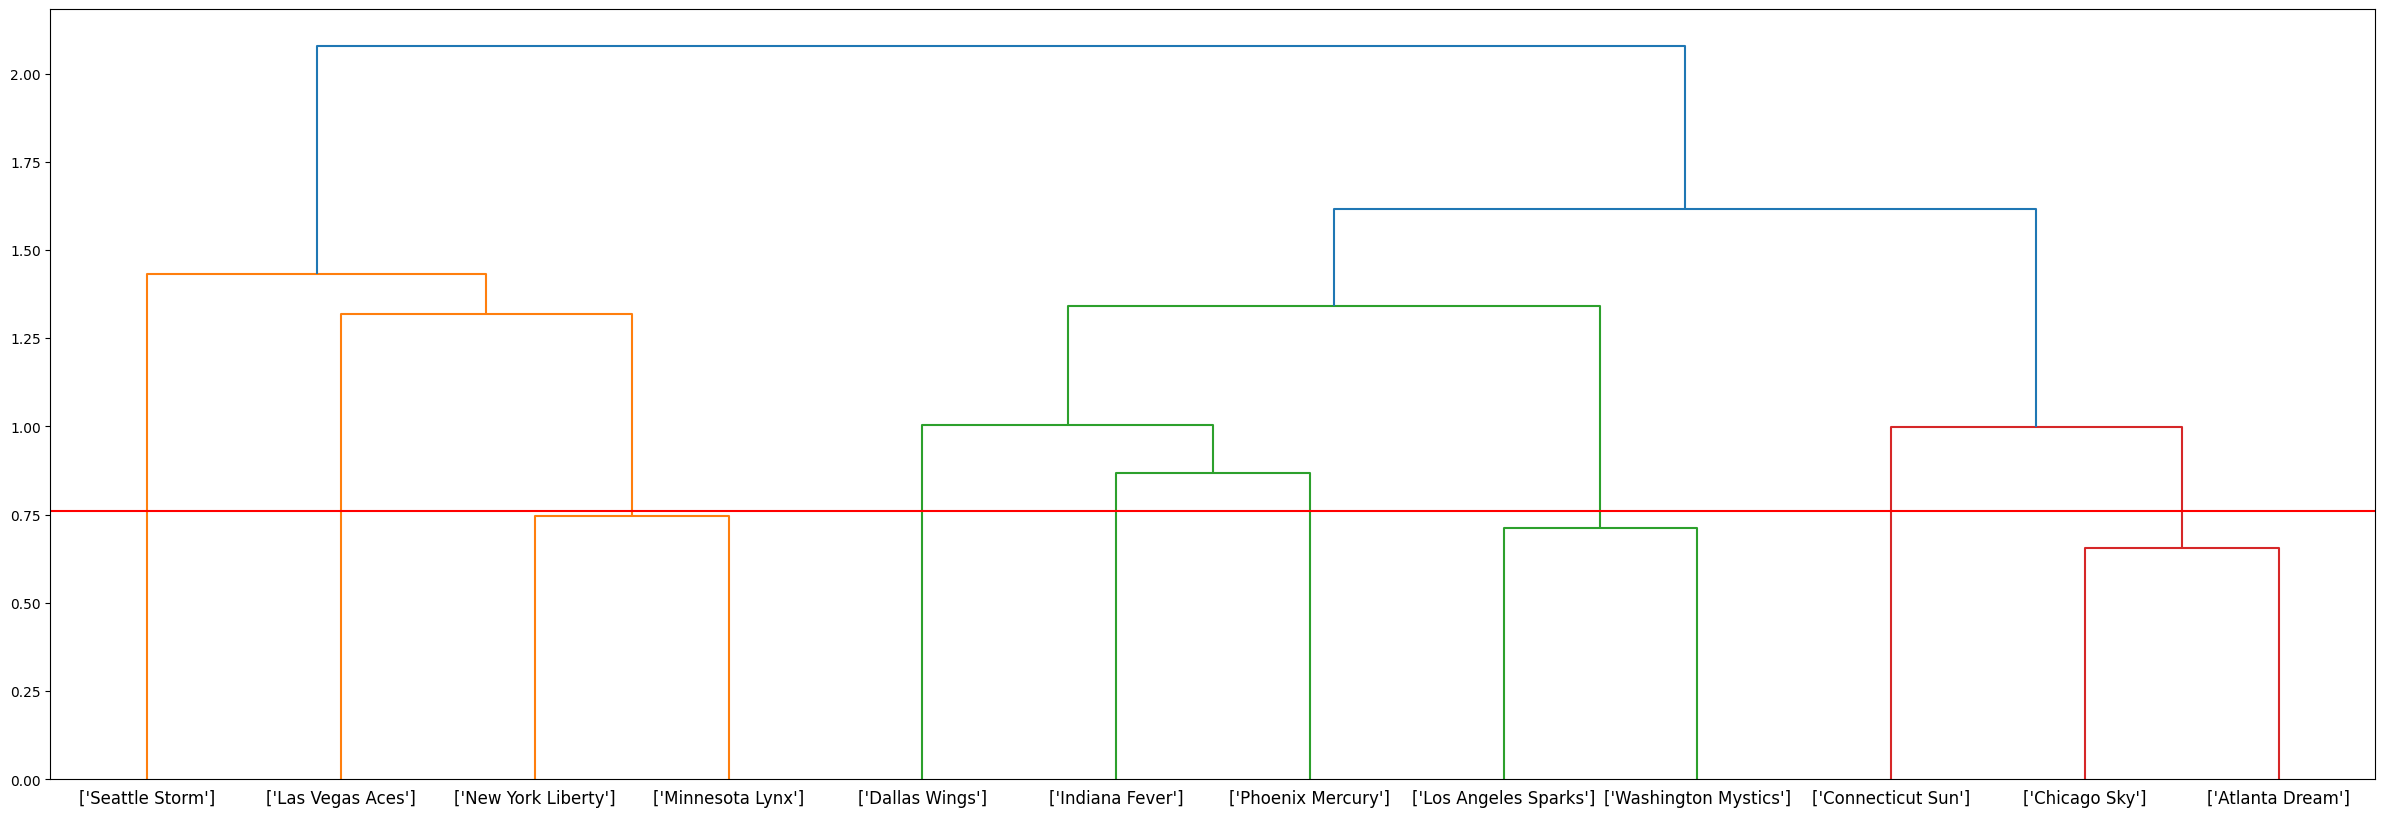

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
normalized_data = data[['PTS_normalized', 'FG%_normalized', '3P%_normalized', 'FT%_normalized', 'OR_normalized', 'DR_normalized', 'AST_normalized', 'STL_normalized', 'BLK_normalized', 'TO_normalized']]
distance_matrix_normalized = pdist(normalized_data, 'euclidean')
est = hierarchy.linkage(distance_matrix_normalized, method = 'complete', optimal_ordering = True)
dendrogram = hierarchy.dendrogram(est,labels=labels_array, color_threshold=1.5)
plt.axhline(y=.76, color='r')

In [ ]:
cluster_labels = hierarchy.cut_tree(est, height = 1.5)
data['Cluster'] = cluster_labels
cluster_num = 0
data[data['Cluster'] == cluster_num]['PTS'].mean()

84.3

In [ ]:
for i in range(max(data['Cluster']+1)):
  cluster_info = data[(data['Cluster'] == i)]
  print('Cluster ' + str(i) + ':')
  print(cluster_info['TEAM'])
  print()

Cluster 0:
0    New York Liberty
1      Minnesota Lynx
3      Las Vegas Aces
4       Seattle Storm
Name: TEAM, dtype: object

Cluster 1:
2    Connecticut Sun
7      Atlanta Dream
9        Chicago Sky
Name: TEAM, dtype: object

Cluster 2:
5          Indiana Fever
6        Phoenix Mercury
8     Washington Mystics
10          Dallas Wings
11    Los Angeles Sparks
Name: TEAM, dtype: object



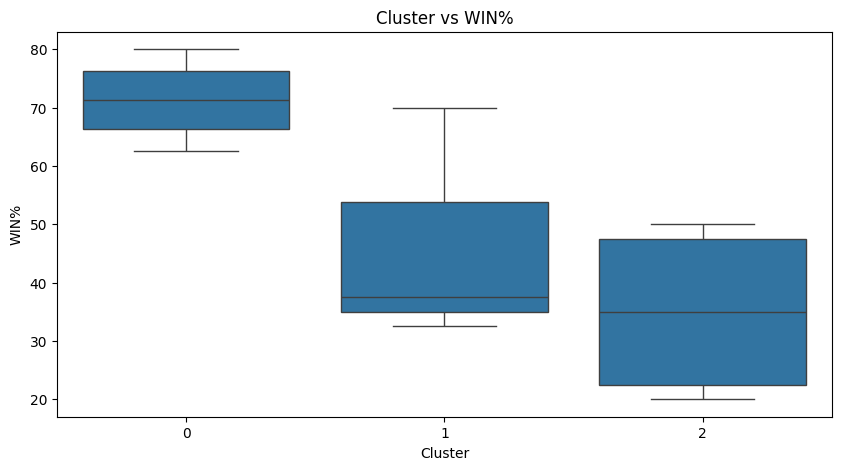

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x = 'Cluster', y = 'WIN%', data = data)
plt.xlabel('Cluster')
plt.ylabel('WIN%')
plt.title('Cluster vs WIN%')
plt.show()

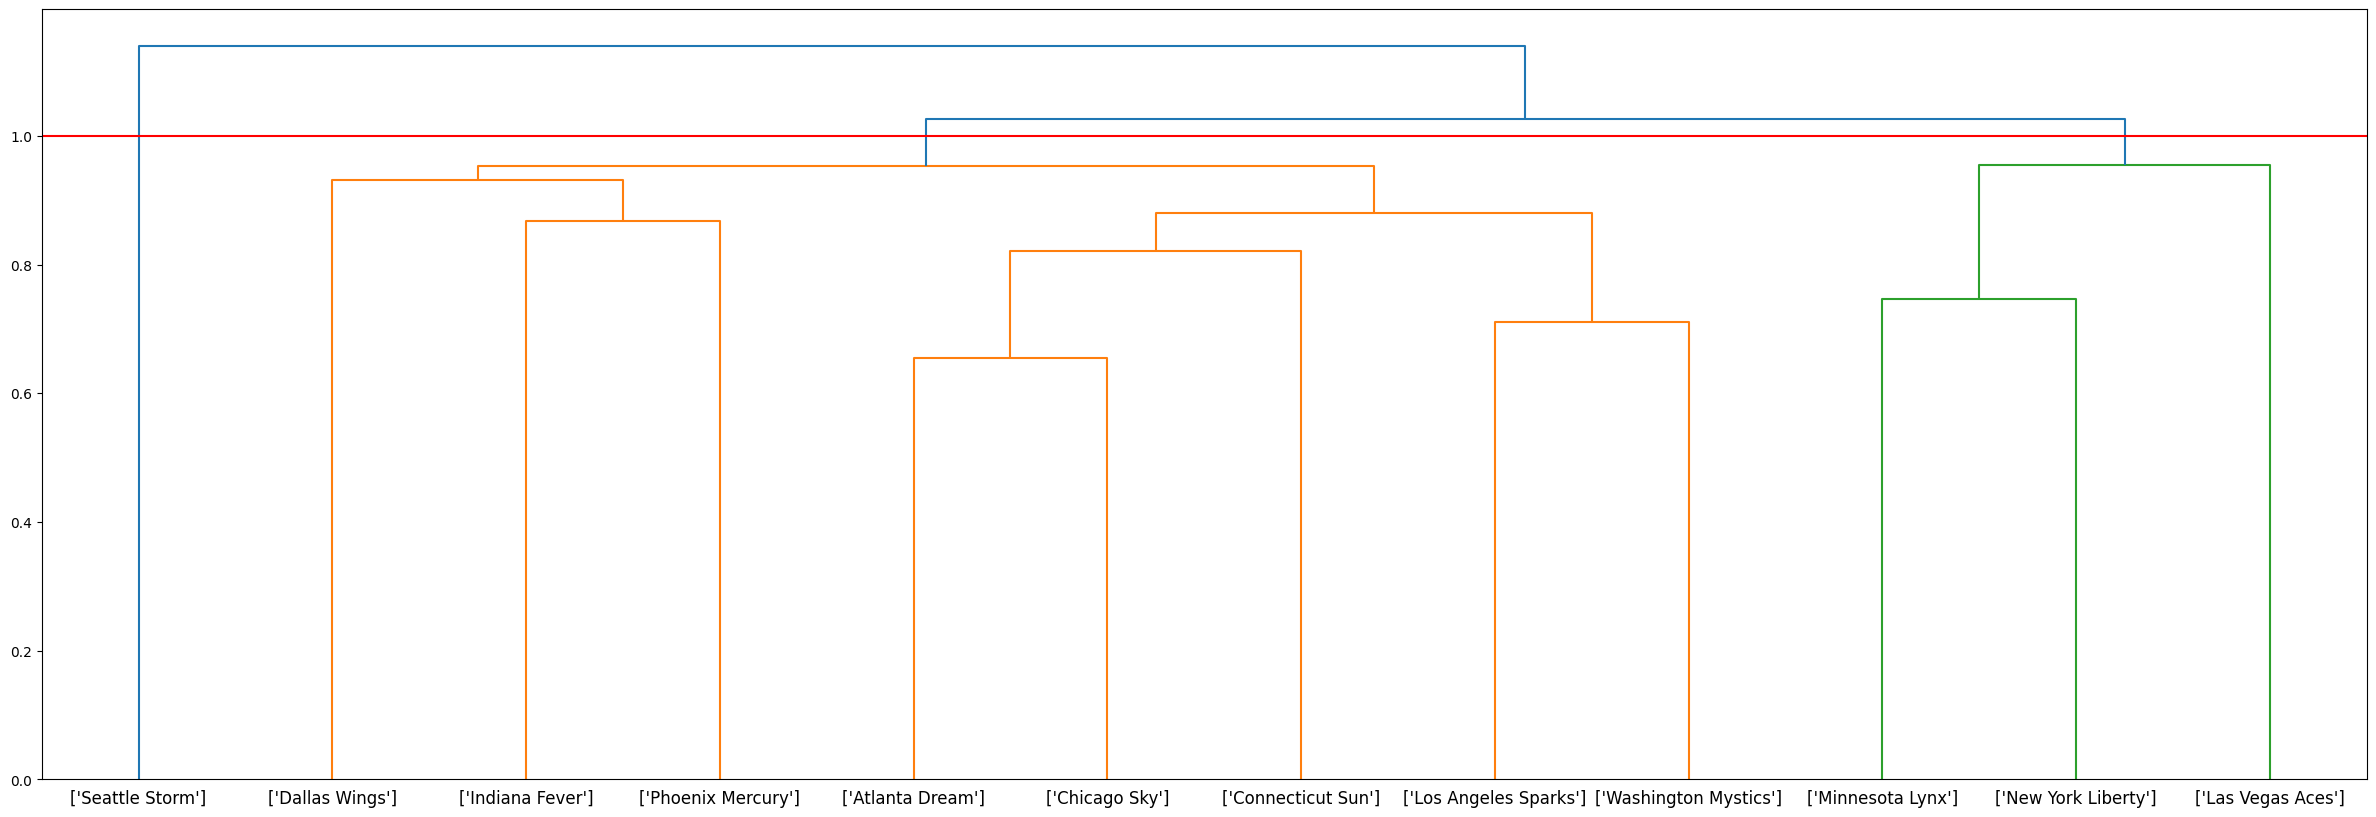

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
est = hierarchy.linkage(distance_matrix_normalized, method = 'single', optimal_ordering = True)
dendrogram = hierarchy.dendrogram(est,labels=labels_array, color_threshold=1)
plt.axhline(y=1, color='r')

In [ ]:
cluster_labels = hierarchy.cut_tree(est, height = 1)
data['Cluster'] = cluster_labels

In [ ]:
for i in range(max(data['Cluster']+1)):
  cluster_info = data[(data['Cluster'] == i)]
  print('Cluster ' + str(i) + ':')
  print(cluster_info['TEAM'])
  print()

Cluster 0:
0    New York Liberty
1      Minnesota Lynx
3      Las Vegas Aces
Name: TEAM, dtype: object

Cluster 1:
2        Connecticut Sun
5          Indiana Fever
6        Phoenix Mercury
7          Atlanta Dream
8     Washington Mystics
9            Chicago Sky
10          Dallas Wings
11    Los Angeles Sparks
Name: TEAM, dtype: object

Cluster 2:
4    Seattle Storm
Name: TEAM, dtype: object



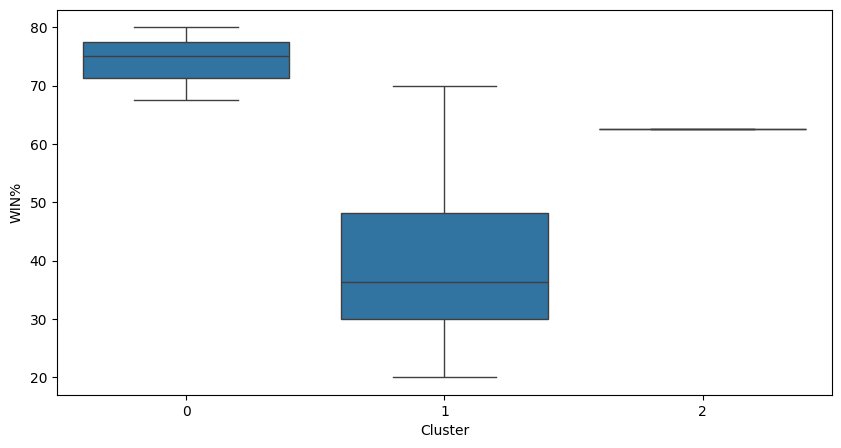

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x = 'Cluster', y = 'WIN%', data = data)
plt.xlabel('Cluster')
plt.ylabel('WIN%')
plt.show()